<a href="https://colab.research.google.com/github/sayarghoshroy/Image-Classification-Formulations/blob/master/Techniques_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")

# To view shapes:
# print(train_data.shape, test_data.shape)
# print(train_labels.shape, test_labels.shape)

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Visualization

Visualizing the eigen value spectrum of the covariance matrices for various sample units. The eigen value spectrum is normalized and we visualize only the first 100 components.

Rank of Covariance Matrix = 480


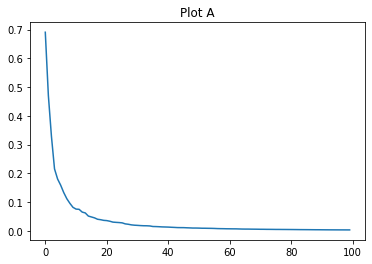

In [3]:
# Samples corresponding to the number 7

roll_data = np.zeros(shape = (6000, 784))
count = 0

for iter in range(6000):
    
    if train_labels[iter] == 7:
        roll_data[count,:] = train_data[iter,:]
        count += 1
        
eigenvalues, _ = np.linalg.eig(np.cov(roll_data[:count, :].T))
eigenvalues = np.sort(eigenvalues)
eigenvalues = np.flip(eigenvalues) / np.linalg.norm(eigenvalues)

print("Rank of Covariance Matrix =", str(np.linalg.matrix_rank(roll_data[:count, :])))

plt.plot(np.real(eigenvalues[0:100]))
plt.title("Plot A")
plt.show()

Rank of Covariance Matrix = 480


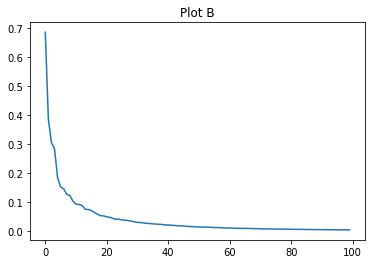

In [4]:
# Samples corresponding to the number 8

roll_data = np.zeros(shape = (6000, 784))
count = 0

for iter in range(6000):
    
    if train_labels[iter] == 8:
        roll_data[count,:] = train_data[iter,:]
        count += 1
        
eigenvalues, _ = np.linalg.eig(np.cov(roll_data[:count, :].T))
eigenvalues = np.sort(eigenvalues)
eigenvalues = np.flip(eigenvalues) / np.linalg.norm(eigenvalues)

print("Rank of Covariance Matrix =", str(np.linalg.matrix_rank(roll_data[:count, :])))

plt.title("Plot B")
plt.plot(eigenvalues[0:100])
plt.show()

Rank of Covariance Matrix = 658


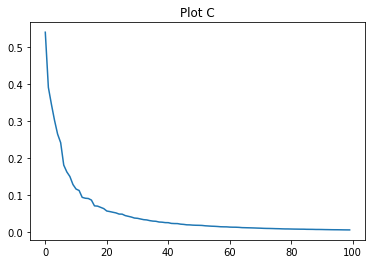

In [5]:
# Entire training data

roll_data = np.zeros(shape = (6000, 784))
count = 0

for iter in range(6000):
    roll_data[count,:] = train_data[iter,:]
    count += 1
        
eigenvalues, _ = np.linalg.eig(np.cov(roll_data[:count, :].T))
eigenvalues = np.sort(eigenvalues)
eigenvalues = np.flip(eigenvalues) / np.linalg.norm(eigenvalues)

print("Rank of Covariance Matrix =", str(np.linalg.matrix_rank(roll_data[:count, :])))

plt.title("Plot C")
plt.plot(eigenvalues[0:100])
plt.show()

Rank of Covariance Matrix = 634


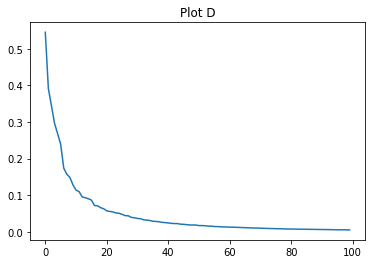

In [6]:
# Randomly selected 50% of the training data

roll_data = np.zeros(shape = (6000, 784))
count = 0

random_train_data = np.random.permutation(train_data)

for iter in range(int(6000 / 2)):
    roll_data[count,:] = random_train_data[iter,:]
    count += 1
        
eigenvalues, _ = np.linalg.eig(np.cov(roll_data[:count, :].T))
eigenvalues = np.sort(eigenvalues)
eigenvalues = np.flip(eigenvalues) / np.linalg.norm(eigenvalues)

print("Rank of Covariance Matrix =", str(np.linalg.matrix_rank(roll_data[:count, :])))

plt.title("Plot D")
plt.plot(eigenvalues[0:100])
plt.show()

## Analysis

Plots A and B are very similar. This is because both the plots A and B represent labels of one particular type. Hence, the number of dimensions in which a significant variation of parameters will be seen is small and pretty identical. We can see that they even have the same rank for their covariance matrices (= 480) indicating that their number of positive eigenvalues is the same.

Plots B and C show a significant difference. This is because plot C contains the entire training data. Hence the number of dimensions in which a significant variation of parameters can be found is much higher compared to the case where all datapoints belong to the same class. This leads to a higher rank (= 658) which is the number of positive eigenvalues.

We compute the ranks of the plots at 480, 480, 638, and 658 respectively.

By Looking at the graphs, it is fair to estimate a rank of
1. 62 for Plot a
2. 62 for Plot b
3. 100+ for Plot c
4. 100+ for Plot d

> based on visually perceiving when the curve approaches 0.


## Number of Distinct Theoretically Possible Images

There are a total of $2^{784}$ possible images according to the MNIST parameters. \[We have 784 cells, each which has 2 choices, either 0 or 1\]

## Percentage of Theoretically Possible Images for which we have accessible labels

Percentage of population accessible to us as MNIST data = $\big( \frac{7000}{2^{784}} \times 100 \big)$ %

> As test_data is also "accessible".

## Structure of Eigenvalue Spectrum of the entire Population Space 

Lets say, all the possible $2^{784}$ datapoints appear exactly once. Then, we have a 784-dimensional cube. The $784 \times 784$ covariance matrix will be diagonal, all diagonal components being the same.

This is because the covariances for any 2 pair of different dimensions will be 0. \[Data is arranged in a perfectly regular fashion, hence covariance along any pair of dimensions is 0 as the orientation of the data in those 2 dimensions is neither positively aligned, nor negatively but is perfectly neutral.\]

All the diagonal elements are the same because the variances for every dimension is the same i.e = $\frac{1}{4}$. Since, the mean for a dimension is $\frac{1}{2}$ and the points are 0 and 1.

Hence all the eigenvalues are the same and the eigenvalue spectrum graph will be a series of 784 line segments of uniform height.

---

# Linear Transformation

### Effect on eigen spectrum due to the multiplication of dataset by an orthonormal matrix

Eigenvalue Spectrum should remain constant if the matrix is orthonormal.
Transformation with an orthogonal matrix will cause rotation or shearing and scaling. All distances will be preserved post-transformation. Only a rotation about a point can be brought about by the change.

Thus, this only brings about a change in the orientation of data. The eigenvectors will rotate accordingly but since there is NO scaling or shearing or translation involved, the eigenvalues remain invariant.

\[Assuming the matrix is a square matrix and there is no dimensionality reduction involved.\]

---

## Effect on eigen spectrum due to multiplication of dataset by a rank deficient matrix (say of rank 2)

The eigenvalue spectrum will have 2 positive eigenvalues at the maximum, the other eigen-values all being 0.

We know $rank(A.B) \le rank(A)$

and $rank(A.B) \le rank(B)$

which implies that $rank(A.B) \le min(rank(A), rank(B))$

Hence, on multiplying with a matrix of rank $\le 2$, the rank of the resultant is less than or equal to 2.
Therefore, the number of non-zero eigen values is also less than or equal to 2.

## Projection of Data into 2 dimensions

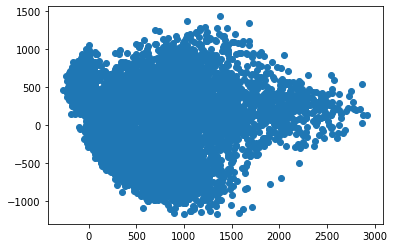

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(np.cov(train_data.T))

x = np.zeros(6000)
y = np.zeros(6000)

positions = np.flip(np.argsort(eigenvalues))

for iter in range(6000):
    x[iter] = np.real(np.dot(train_data[iter,:], eigenvectors[:, positions[0]]))
    y[iter] = np.real(np.dot(train_data[iter,:], eigenvectors[:, positions[1]]))
    
plt.scatter(x, y)
plt.show()

## Probabilistic View

Classifying the test set by fitting multivariate gaussians on the train set with different choices for decision boundaries.

In [8]:
# Computing accuracy on the test set using MLE

means = []
covs = []
pseudocovs = []
logdet_values = []

for label in range(10):
    label_data = np.zeros(shape = (6000, 784))
    count = 0
    for iter in range(6000):
        if int(train_labels[iter]) == label:
            label_data[count,:] = train_data[iter,:]
            count += 1

    means.append(np.mean(label_data[:count, :], axis = 0))

    temp = (np.cov(label_data[:count, :], rowvar = False))
    covs.append(temp)
    pseudocovs.append(np.linalg.pinv(temp))

    eig_values, _ = np.linalg.eig(temp)
    pseudo_determinant = 0
    for element in eig_values:
        if(np.real(element) > 1e-5):
            pseudo_determinant += np.log(np.real(element))
            
    logdet_values.append(pseudo_determinant)

def prob(x, classID):
    global means
    global pseudocovs
    global logdet_values
    
    A = x - means[classID]
    
    B = np.matmul(np.matmul(A.T, pseudocovs[classID]), A)
    
    ret = (- (logdet_values[classID] + B))
    return ret

#calculating the accuracy for the test set
cnt = 0
for iter in range(1000):
    probabilities = np.zeros(10)
    for label in range(10):
        temp = prob(test_data[iter,:], label)
        probabilities[label] = temp
    
    best_label = np.argmax(probabilities)
    if(int(best_label) == int(test_labels[iter])):
        cnt += 1

print("Accuracy on test set using MLE :", str(cnt / 10), " %")

Accuracy on test set using MLE : 74.4  %


In [9]:
# Computing accuracy on the test set using MAP

# Assume prior probability of a class C = (Number of datapoints in the class in train_set) / (Total number of datapoints in train_set)
# Therefore, Prior Probability = 600 / 6000 = 1 / 10 = 0.1 for each class
# According to the train_set given to us, there are 600 datapoints for every class
# We use the Bayesian equation to compute the probabilities

def prob_MAP(x, classID):
    global means
    global pseudocovs
    global logdet_values
    
    A = x - means[classID]
    
    B = np.matmul(np.matmul(A.T, pseudocovs[classID]), A)
    
    # Adding the log of the prior probability, which is a constant
    ret = ((- 0.5 * (logdet_values[classID] + B) ) - (784 / 2) * np.log(2 * np.pi)) + np.log(0.1)
    return ret

#calculating the accuracy for the test set using prob_MAP

cnt = 0
for iter in range(1000):
    probabilities = np.zeros(10)
    for label in range(10):
        temp = prob_MAP(test_data[iter,:], label)
        probabilities[label] = temp
    
    best_label = np.argmax(probabilities)
    if(int(best_label) == int(test_labels[iter])):
        cnt += 1

print("Accuracy on test set using MAP :", str(cnt / 10), " %")

Accuracy on test set using MAP : 74.4  %


In [10]:
# Computing accuracy using Bayesian pairwise majority voting method
pairs = [] 

for i in range(10):
    for j in range(i):
        pairs.append((j, i))
        
dict_covs = {}
dict_pseudocovs = {}
dict_logdets = {}

for pair in pairs:
    cov_mat = (covs[pair[0]] + covs[pair[1]]) * (0.5)
    dict_covs[pair] = cov_mat
    
    dict_pseudocovs[pair] = np.linalg.pinv(cov_mat)

    eig_values, _ = np.linalg.eig(cov_mat)
    pseudo_determinant = 0
    
    for element in eig_values:
        if(np.real(element) > 1e-5):
            pseudo_determinant += np.log(np.real(element))
            
    dict_logdets[pair] = pseudo_determinant
    
def prob_pair(x, class_pair):
    ret_pair = [0, 0]
    
    for idx in range(2):
        A = x - means[class_pair[idx]]
        B = np.matmul(np.matmul(A.T, dict_pseudocovs[class_pair]), A)

        ret_pair[idx] = (- (dict_logdets[class_pair] + B))
        
    return ret_pair

cnt = 0
for iter in range(1000):
    freq = np.zeros(10)
    
    for pair in pairs:
        probs_found = prob_pair(test_data[iter,:], pair)
        if(probs_found[0] > probs_found[1]):
            freq[pair[0]] += 1
            continue
        freq[pair[1]] += 1
    
    chosen_label = np.argmax(freq)
    if(chosen_label == int(test_labels[iter])):
        cnt += 1

print("Accuracy on test set using Bayesian Pairwise Majority Voting :", str(cnt / 10), " %")

Accuracy on test set using Bayesian Pairwise Majority Voting : 83.7  %


In [11]:
# Computing accuracy using Simple Perpendicular Bisector majority voting method

cnt = 0

for iter in range(1000):
    distances = np.zeros(10)
    freq = np.zeros(10)
    
    for label in range(10):
        distances[label] = np.linalg.norm(test_data[iter] - means[label])
        
    for pair in pairs:
        if(distances[pair[0]] < distances[pair[1]]):
            freq[pair[0]] += 1
            continue
        freq[pair[1]] += 1
    
    chosen_label = np.argmax(freq)
    if(chosen_label == int(test_labels[iter])):
        cnt += 1

print("Accuracy on test set using Simple Perpendicular Bisector Majority Voting method :", str(cnt / 10), " %")

Accuracy on test set using Simple Perpendicular Bisector Majority Voting method : 77.0  %


## Observations

The performance order is as follows:

1. Bayesian Pairwise Majority Voting : 83.8  %

2. Simple Perpendicular Bisector Majority Voting method : 77.0  %

3. MAP : 74.4  % = MLE : 74.4  %

Points to Consider:

- Pariwise Voting Methods seem to work better than the others. This is typically the standard way of doing multiclass classification problems using other popular methods involving linear classifiers.

- Majority voting using Gaussians having same covariance matrices gives the best result. The data seems to be clustered into classes which can be nicely fit into Gaussian models and separated linearly.

- Experiments with a single covariance matrix factoring all the train_data for MAP and MLE gives better results. Therefore, linear classifiers seem to be working better than quadratic ones and this might depict a classic case of overfitting.

## Nearest Neighbour based Analysis

Implementing a KNN classifier to compute accuracies on the test set with K = 1, 3, 5, 7

In [12]:
# Calculating accuracies with K = 1, 3, 5, 7

distance = np.zeros(shape = (1000, 6000))
positions = np.zeros(shape = (1000, 6000))

for iter in range(1000):
    
    for train_iter in range(6000):
        distance[iter][train_iter] = np.linalg.norm(train_data[train_iter, :] - test_data[iter, :])
        
    positions[iter, :] = np.argsort(distance[iter, :])
    
# K = 1
count = 0

for iter in range(1000):
    if train_labels[int(positions[iter][0])] == test_labels[iter]:
        count += 1
        
print("Accuracy with K = 1 is", str(count / 10))

def calculate(K):
    count = 0

    for iter in range(1000):
        freq = np.zeros(10)

        for index in range(K):
            freq[int(train_labels[int(positions[iter][index])])] += 1

        maximize = np.flip(np.argsort(freq))

        if maximize[0] == test_labels[iter]:
            count += 1

    return(count / 10)

# K = 3
print("Accuracy with K = 3 is", str(calculate(3)))

# K = 5
print("Accuracy with K = 5 is", str(calculate(5)))

# K = 7
print("Accuracy with K = 7 is", str(calculate(7)))   

Accuracy with K = 1 is 90.7
Accuracy with K = 3 is 92.3
Accuracy with K = 5 is 92.4
Accuracy with K = 7 is 91.8


## Analysis

Accuracies vary. This is mostly because of noisy data.

Lets say, a point P in test set has the closest point H in the train set which is wrongly classified.

The 2nd and 3rd closest points to P in the train set were the labels with the correct values.

Having K = 3 correctly classifies P in this case.

It all depends on the arrangement of the data in space.
For K = 7, the 4th, 5th, 6th, 7th nearest neighbours may not belong to the same class as P and may end up causing a misclassification.

To identify best K, we try consecutive odd values of K starting from 1 and STOP when the accuracy begins to go down.
This is kind of similar to early stopping where one prevents overfitting while performing gradient descent while checking the accuracy on a validation set.

In [13]:
# Finding the best value of K
prev = 0
for iter in range(1000):
    if (iter % 2 == 0):
        continue
    temp = calculate(iter)
    if(temp < prev):
        print( str(iter - 2), "is the best value of K")
        break
    prev = temp

5 is the best value of K


### Reverse Nearest Neighbour based outlier detection
IDEA: A sample can be thought of as an outlier if it is NOT in the nearest neighbour set of any other sample.

Expanding this into an algorithm.

In [14]:
# Reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and not meant for consideration

mixed_data, _ = read_data("outliers.csv")

# To View Structure of the data:
# print(mixed_data.shape)

In [15]:
# Finding the outliers in the mixed_data

distance_outliers = np.zeros(shape = (6000, 6020))
positions_outliers = np.zeros(shape = (6000, 6020))

is_not_outlier = np.zeros(20) 

for iter in range(6000):
    
    for train_iter in range(6020):
        if(train_iter == iter):
            distance_outliers[iter][train_iter] = float('inf')
            continue
        if(train_iter >= 6000):
            temp = train_iter - 6000
            distance_outliers[iter][train_iter] = np.linalg.norm(train_data[iter, :] - mixed_data[temp, :])
            continue
        distance_outliers[iter][train_iter] = np.linalg.norm(train_data[train_iter, :] - train_data[iter, :])
        
    positions_outliers[iter, :] = np.argsort(distance_outliers[iter, :])
    
    #Rules out elements in mixed_data from the outliers class
    for checker in range(3):
        if (positions_outliers[iter][checker] >= 6000):
            is_not_outlier[int(int(positions_outliers[iter][checker]) - 6000)] = 1
            print("Ruling out " + str(int(positions_outliers[iter][checker]) - 6000) + " based on " + str(iter))

print("Outliers: ")
for find in range(20):
    if(int(is_not_outlier[find]) == 0):
        # To view the ruling out decisions
        print(find)

Ruling out 16 based on 54
Ruling out 14 based on 380
Ruling out 8 based on 435
Ruling out 13 based on 451
Ruling out 1 based on 778
Ruling out 14 based on 914
Ruling out 15 based on 1044
Ruling out 3 based on 1075
Ruling out 1 based on 1075
Ruling out 3 based on 1127
Ruling out 1 based on 1160
Ruling out 15 based on 1496
Ruling out 15 based on 1680
Ruling out 12 based on 1697
Ruling out 15 based on 1703
Ruling out 14 based on 1732
Ruling out 8 based on 2051
Ruling out 15 based on 2301
Ruling out 13 based on 2327
Ruling out 15 based on 2870
Ruling out 15 based on 2980
Ruling out 17 based on 3056
Ruling out 15 based on 3468
Ruling out 8 based on 3943
Ruling out 19 based on 3970
Ruling out 14 based on 3998
Ruling out 10 based on 4130
Ruling out 1 based on 4153
Ruling out 13 based on 4356
Ruling out 8 based on 4505
Ruling out 15 based on 4554
Ruling out 12 based on 4634
Ruling out 15 based on 4708
Ruling out 14 based on 4838
Ruling out 15 based on 4979
Ruling out 19 based on 5044
Ruling ou

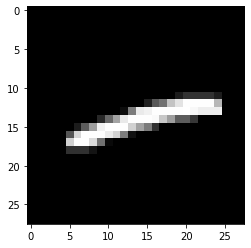

In [16]:
# The following image was present in the provided training data
# Visualizing a training data image for clarity
w, h = 28, 28
img = train_data[4554].reshape(w,h).T
plt.imshow(img, cmap='gray')

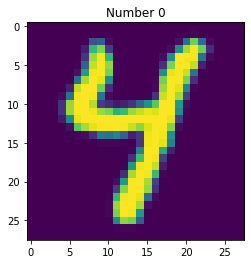

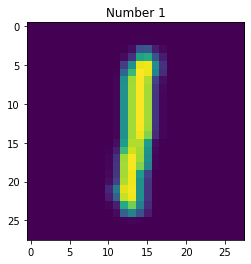

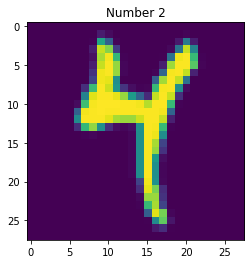

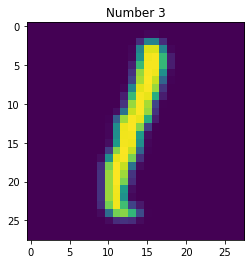

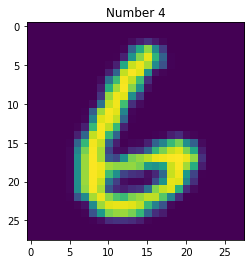

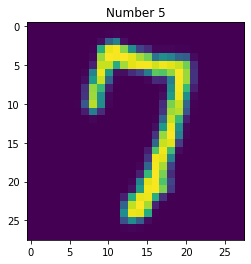

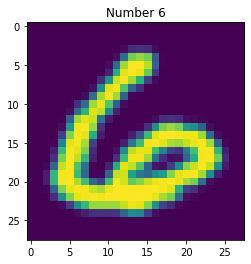

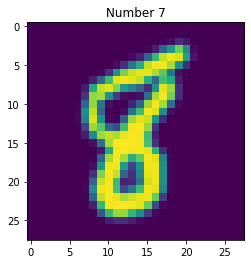

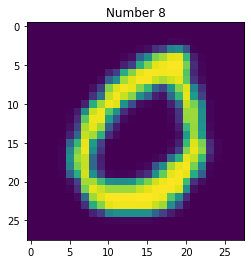

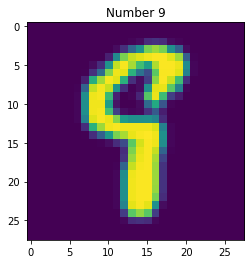

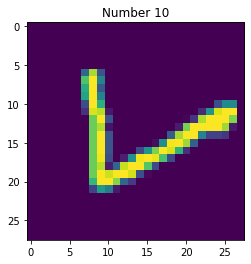

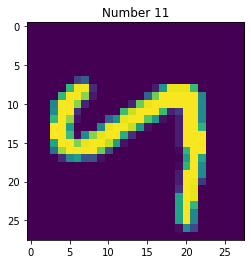

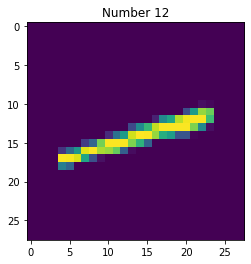

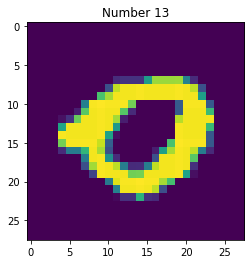

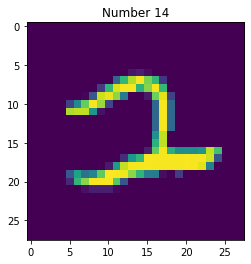

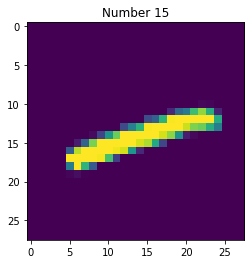

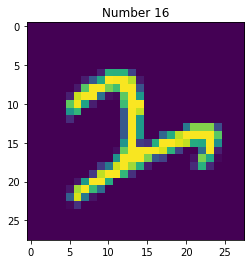

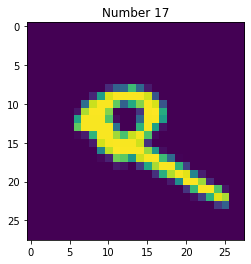

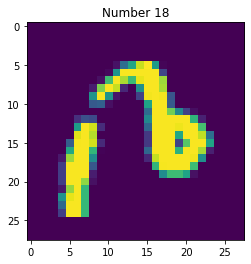

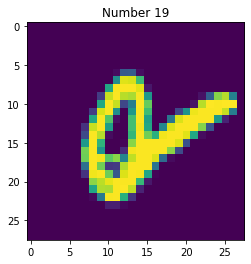

In [17]:
# Visualizing the mixed_data
w, h = 28, 28
image = []
for idx in range(20):
    image.append(mixed_data[idx].reshape(w,h).T)
    
for idx in range(20):
    plt.figure(1);
    plt.clf()
    plt.imshow(image[idx])
    plt.title('Number ' + str(idx))
    plt.pause(1)

### Nearest Neighbour Methods for regression
Assume that each classID in the train set corresponds to a neatness score as:

$$ neatness = \frac{classID}{10} $$

We could use the following algorithm to predict the neatness score for each test sample using NN based techiniques on the train set.

```
define function mean_abs_error which takes one integer argument K:
    let count = 0
    let iter = 0
    while iter < 1000 DO
        create an array 'freq' with 10 elements, all initialized to 0s
        index = 0
        while index < K DO
            increment freq [label of element in positions array at (iter, index)] by 1
            increment index by 1
        DONE
        let maximize be an array with positions of elements in freq, sorted in descending order by their values
        let mean = 0
        let classID = 0
        while classID < 10 DO
            increment mean by (classID * element at location classID in array freq)
            increment classID by 1
        DONE
        modify mean to mean / K
        increment count by absolute value of (((element at position iter of array test_labels) - mean) / 10)
        increment iter by 1
    DONE
    return value of (count / 1000)
Call the function mean_abs_error with a suitable value, say 7
```

### Experiment

Validating the above algorithm on the test set

In [18]:
def mean_abs_error(K):
    count = 0

    for iter in range(1000):
        freq = np.zeros(10)

        for index in range(K):
            freq[int(train_labels[int(positions[iter][index])])] += 1

        maximize = np.flip(np.argsort(freq))

        mean = 0
        for classID in range(10):
            mean += classID * freq[classID]
        mean /= K
        count += (abs(test_labels[iter] - mean) / 10)
        
    return(count / 1000)

#K = 1
print("Mean Absolute Error for K = 1 is", str(mean_abs_error(1)))

#K = 3
print("Mean Absolute Error for K = 3 is", str(mean_abs_error(3)))

#K = 5
print("Mean Absolute Error for K = 5 is", str(mean_abs_error(5)))

#K = 7
print("Mean Absolute Error for K = 7 is", str(mean_abs_error(7)))

#K = 9
print("Mean Absolute Error for K = 9 is", str(mean_abs_error(9)))

Mean Absolute Error for K = 1 is 0.03540000000000002
Mean Absolute Error for K = 3 is 0.03773333333333335
Mean Absolute Error for K = 5 is 0.04087999999999997
Mean Absolute Error for K = 7 is 0.04377142857142868
Mean Absolute Error for K = 9 is 0.04644444444444455


## $Thank\ You$

---